# Processamento de Sinais Multimédia
## Semestre Inverno 2025/26

## Guia Aula Prática - Filtragem


1. Considere os sistemas definidos pelas equações às diferenças:

$y_1[n]= x[n] - r x[n-c]$,

$y_2[n]= x[n] - r y_2[n-c]$,

Considere sequencialmente as situações onde o atraso c toma os valores c=1 ou c=2, e o fator multiplicativo r toma os valores r=0.9 ou r=0.1 ou r=-0.9.

b) Obtenha os bks e aks de cada um dos sistemas

$y_1[n] = x[n] - 0.9 x_1[n-2]$

bk = 

ak =

$y_2[n] = x[n] - 0.9 y_2[n-2]$

bk = 

ak = 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
C = np.array([1, 2])
R = np.array([0.9, 0.1, -0.9])

#C = 1
#R = 0.9
ak1 = np.array([1])
bk1 = np.array([1, -R[0]])

ak2 = np.array([1, R[0]])
bk2 = np.array([1])

e) Qual é a resposta em frequência?

Use a função 'w,h=scipy.signal.freqz(bk,ak)'.  Qual a influencia do valor de c nos sistemas?
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html
    

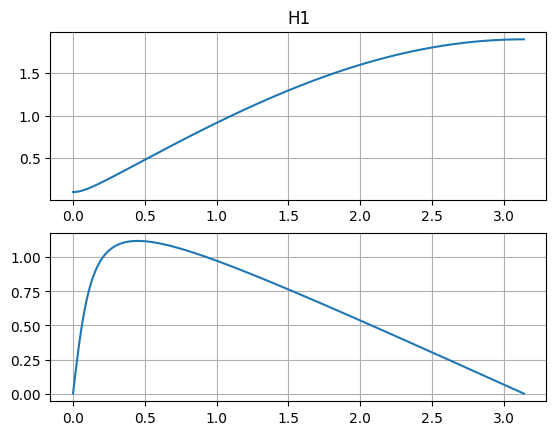

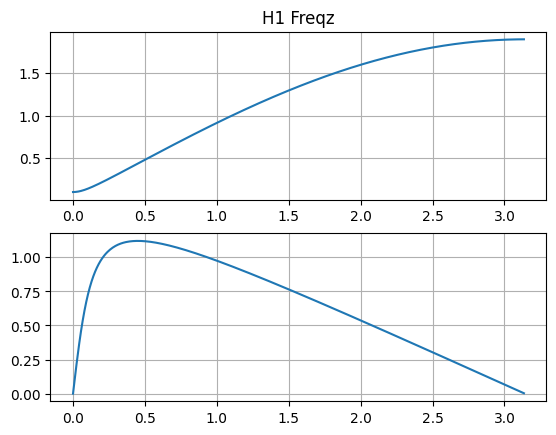

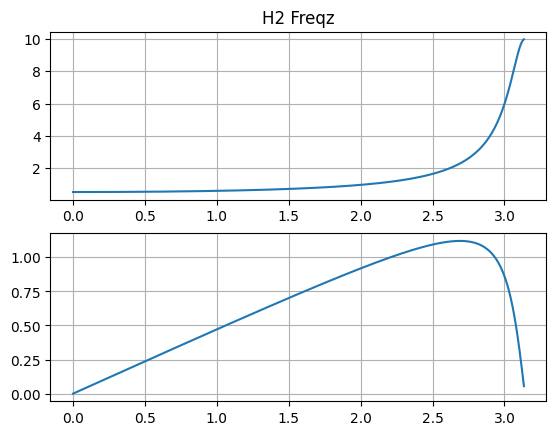

In [25]:
N = 512
w = np.linspace(0, np.pi, N)

H1 = 1-R[0]*np.exp(-1j*w*C[0])
H1_abs = np.abs(H1)
H1_phase = np.angle(H1)

w2, H1_ss = ss.freqz(bk1, ak1)

H1_abs_ss = np.abs(H1_ss)
H1_phase_ss = np.angle(H1_ss)

w3, H2_ss = ss.freqz(bk2, ak2)

H2_abs_ss = np.abs(H2_ss)
H2_phase_ss = np.angle(H2_ss)

plt.figure()
plt.subplot(2,1,1)
plt.plot(w, H1_abs)
plt.grid()
plt.title("H1")
plt.subplot(2,1,2)
plt.plot(w, H1_phase)
plt.grid()
plt.show()

plt.figure()
plt.subplot(2,1,1)
plt.plot(w2, H1_abs_ss)
plt.grid()
plt.title("H1 Freqz")
plt.subplot(2,1,2)
plt.plot(w2, H1_phase_ss)
plt.grid()
plt.show()

plt.figure()
plt.subplot(2,1,1)
plt.plot(w3, H2_abs_ss)
plt.grid()
plt.title("H2 Freqz")
plt.subplot(2,1,2)
plt.plot(w3, H2_phase_ss)
plt.grid()
plt.show()

d) Qual a saída de cada um destes sistemas quando $x[n]=10 + 2\cos(\frac{\pi}{6}n)+ 10
    \cos(\frac{\pi}{3}n)$? Realize este cálculo teoricamente e verifique o resultado usando o python usando a função "y=scipy.signal.lfilter(b,a,x)".

2. Pretende-se desenhar filtros com especifcaçõs conhecidas usando o python. Para tal utilize a função y=scipy.signal.firwin(numtaps, cutoff,pass_zero=True), onde numtaps define a ordem do fltro, cutoff é uma lista que define a(s) frequência(s) de corte e pass zero uma variável boleana (True para passa baixo e False para passa alto e passa banda). Verifque que outros parametros esta função permite defnir.

a) Filtro passa-baixo com frequência de corte $wc = \pi/ 3$.


b) Filtro passa-alto com frequência de corte $wc = \pi/ 3$.
c) Filtro passa-banda com frequência de corte $wc1 = \pi/ 4$ e  $wc2 = \pi/ 3$.

d) Aplique os filtros desenhados em vários sinais wav e verifique os outputs. Quais as frequências de corte e qual a relação com a frequência de amostragem?

bkFir: [-0.01482583  0.97034834 -0.01482583]


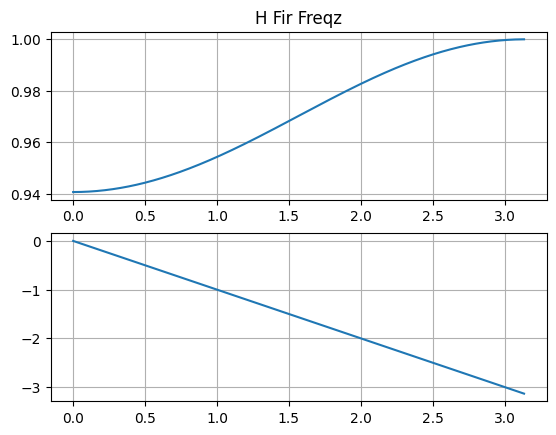

In [28]:
# Numero de coeficientes do filtro FIR
numtaps = 3
wc=np.pi/3
fs=1
cutoff = (wc*fs/2) /(np.pi)  # Normalize the frequency
bkFir = ss.firwin(numtaps, cutoff, pass_zero=False)
print('bkFir:', bkFir)

w2, H_fir_ss = ss.freqz(bkFir, 1, whole=False)
H_Fir_abs_ss = np.abs(H_fir_ss)
H_Fir_phase_ss = np.angle(H_fir_ss)

plt.figure()
plt.subplot(2,1,1)
plt.plot(w2, H_Fir_abs_ss)
plt.grid()
plt.title("H Fir Freqz")
plt.subplot(2,1,2)
plt.plot(w2, H_Fir_phase_ss)
plt.grid()
plt.show()